<a href="https://colab.research.google.com/github/vivianchikaogue-hue/Machine-learning-practice/blob/main/Vivian_Chika_EDA_HR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vivian Chikaodili Oguegbunem
*  WTF/2025/6730
*  vivianchikachigozie@outlook.com





## **Import Libraries and Data**

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **View the Dataset**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/HR_comma_sep 1.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### **Inspect the Data**

In [4]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [7]:
df ["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [28]:
df ["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

### **Relationship Between Features**

In [5]:
emp_retention = df.groupby('left').mean(numeric_only=True)
print(emp_retention)


      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


In [27]:
df.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### **Visualization**

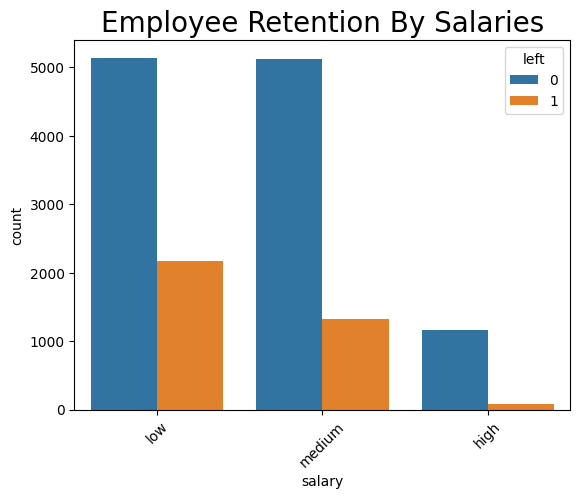

In [24]:
from seaborn.widgets import color_palette
plt.figure ()
sns.countplot(x = "salary", data = df, hue = "left")
plt.xticks(rotation = 45)
plt.title("Employee Retention By Salaries", fontdict = {"fontsize":20})
plt.show()

#Employees with low and medium salaries tend to leave more than those highly paid

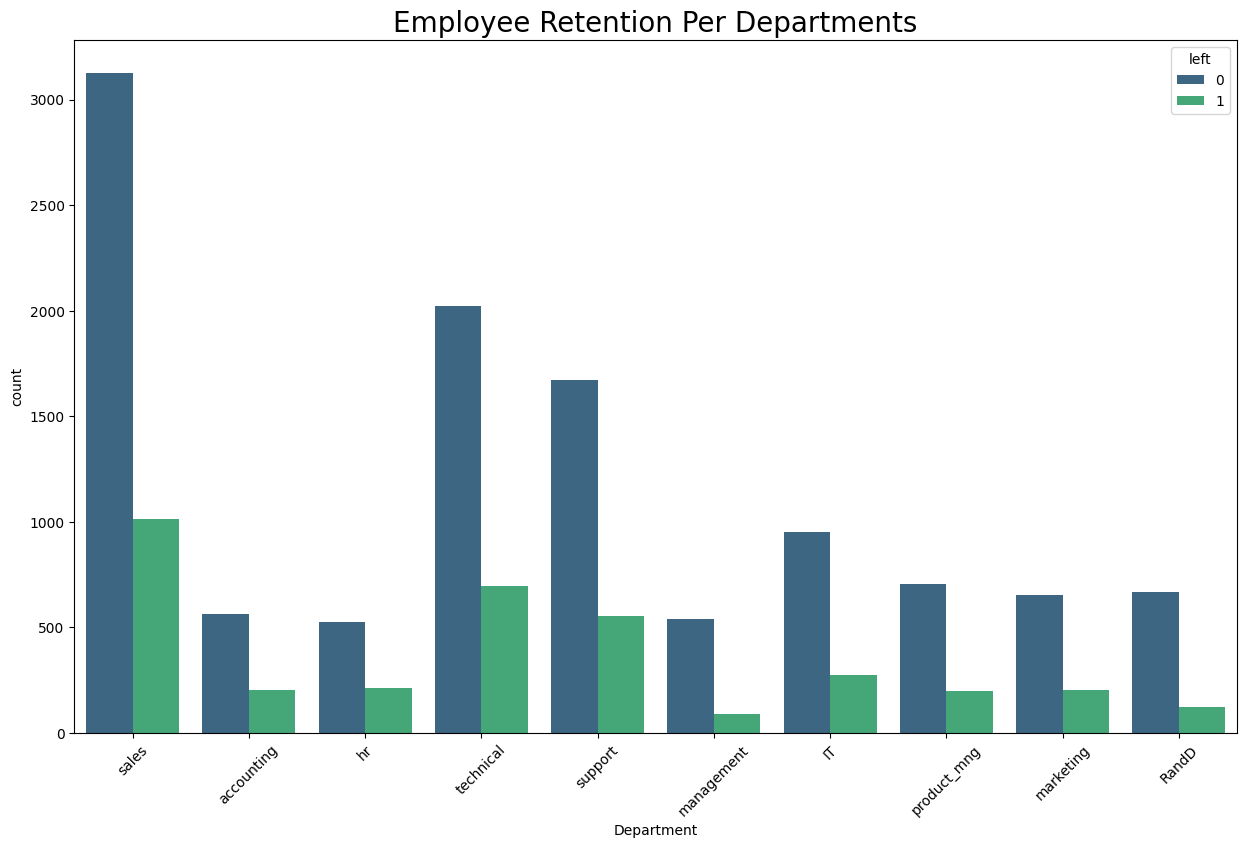

In [23]:
plt.figure(figsize = (15,9))
sns.countplot(x = "Department", data = df, hue = "left", palette='viridis')
plt.xticks(rotation = 45)
plt.title("Employee Retention Per Departments", fontdict = {"fontsize":20})
plt.show()

# The departments that are mostly affected by employess leaving are:
# Sales, Technical, and Support

### **Model Training**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Prepare Features: Including Salary as dummy variables
salary_dummies = pd.get_dummies(df.salary, prefix="salary")
df_with_dummies = pd.concat([df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years']], salary_dummies], axis=1)

X = df_with_dummies
y = df.left

# 2. Split into Training (80%) and Test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 76.20%
